#Team
Mohamed Saied , Farouq Abdellatif ,Youanas Ibrahim ,Ahmed Emam ,Andrew Adel

#Phase 1 – Data Overview & Cleaning

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error
import joblib


#Data Understanding

In [54]:
df=pd.read_csv("/content/student-mat.csv", sep=';')

In [55]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [56]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [57]:
df.sample()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
155,GP,M,15,R,GT3,T,2,3,at_home,services,...,4,4,4,1,1,1,2,11,8,8


In [58]:
df.shape

(395, 33)

In [59]:
df.nunique()

,0
school,2
sex,2
age,8
address,2
famsize,2
Pstatus,2
Medu,5
Fedu,5
Mjob,5
Fjob,5


In [60]:
for col in df.columns:
    print(f"Unique values for column '{col}':")
    print(df[col].unique())
    print("\n")

Unique values for column 'school':
['GP' 'MS']


Unique values for column 'sex':
['F' 'M']


Unique values for column 'age':
[18 17 15 16 19 22 20 21]


Unique values for column 'address':
['U' 'R']


Unique values for column 'famsize':
['GT3' 'LE3']


Unique values for column 'Pstatus':
['A' 'T']


Unique values for column 'Medu':
[4 1 3 2 0]


Unique values for column 'Fedu':
[4 1 2 3 0]


Unique values for column 'Mjob':
['at_home' 'health' 'other' 'services' 'teacher']


Unique values for column 'Fjob':
['teacher' 'other' 'services' 'health' 'at_home']


Unique values for column 'reason':
['course' 'other' 'home' 'reputation']


Unique values for column 'guardian':
['mother' 'father' 'other']


Unique values for column 'traveltime':
[2 1 3 4]


Unique values for column 'studytime':
[2 3 1 4]


Unique values for column 'failures':
[0 3 2 1]


Unique values for column 'schoolsup':
['yes' 'no']


Unique values for column 'famsup':
['no' 'yes']


Unique values for column 'paid':
['no' 

In [61]:
for col in df.columns:
    print(f"Check Balance of column'{col}':")
    print(df[col].value_counts())
    print("\n")

Check Balance of column'school':
school
GP    349
MS     46
Name: count, dtype: int64


Check Balance of column'sex':
sex
F    208
M    187
Name: count, dtype: int64


Check Balance of column'age':
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64


Check Balance of column'address':
address
U    307
R     88
Name: count, dtype: int64


Check Balance of column'famsize':
famsize
GT3    281
LE3    114
Name: count, dtype: int64


Check Balance of column'Pstatus':
Pstatus
T    354
A     41
Name: count, dtype: int64


Check Balance of column'Medu':
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64


Check Balance of column'Fedu':
Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64


Check Balance of column'Mjob':
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64


Check Balance of column'Fjob':
Fjob
other       217
services

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [63]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [64]:
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#Data Cleaning

In [65]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [66]:
df=df.drop_duplicates()

In [67]:
df=df.drop(['school','address','Mjob','Fjob','reason','guardian'],axis=1)

In [68]:


cols = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime',
        'goout','Dalc','Walc','health','absences','G1','G2','G3']

outlier_records = []

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    mask = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)
    for idx in df[mask].index:
        outlier_records.append({
            'Index': idx,
            'Column': col,
            'Value': df.loc[idx, col]
        })

outliers_df = pd.DataFrame(outlier_records)

outliers_df = outliers_df.sort_values('Index').reset_index(drop=True)
print(outliers_df)


     Index    Column  Value
0        2  failures      3
1        7  freetime      1
2       18  failures      3
3       19  freetime      1
4       25  failures      2
..     ...       ...    ...
207    389  freetime      1
208    390      Dalc      4
209    390  failures      2
210    391    famrel      2
211    392  failures      3

[212 rows x 3 columns]


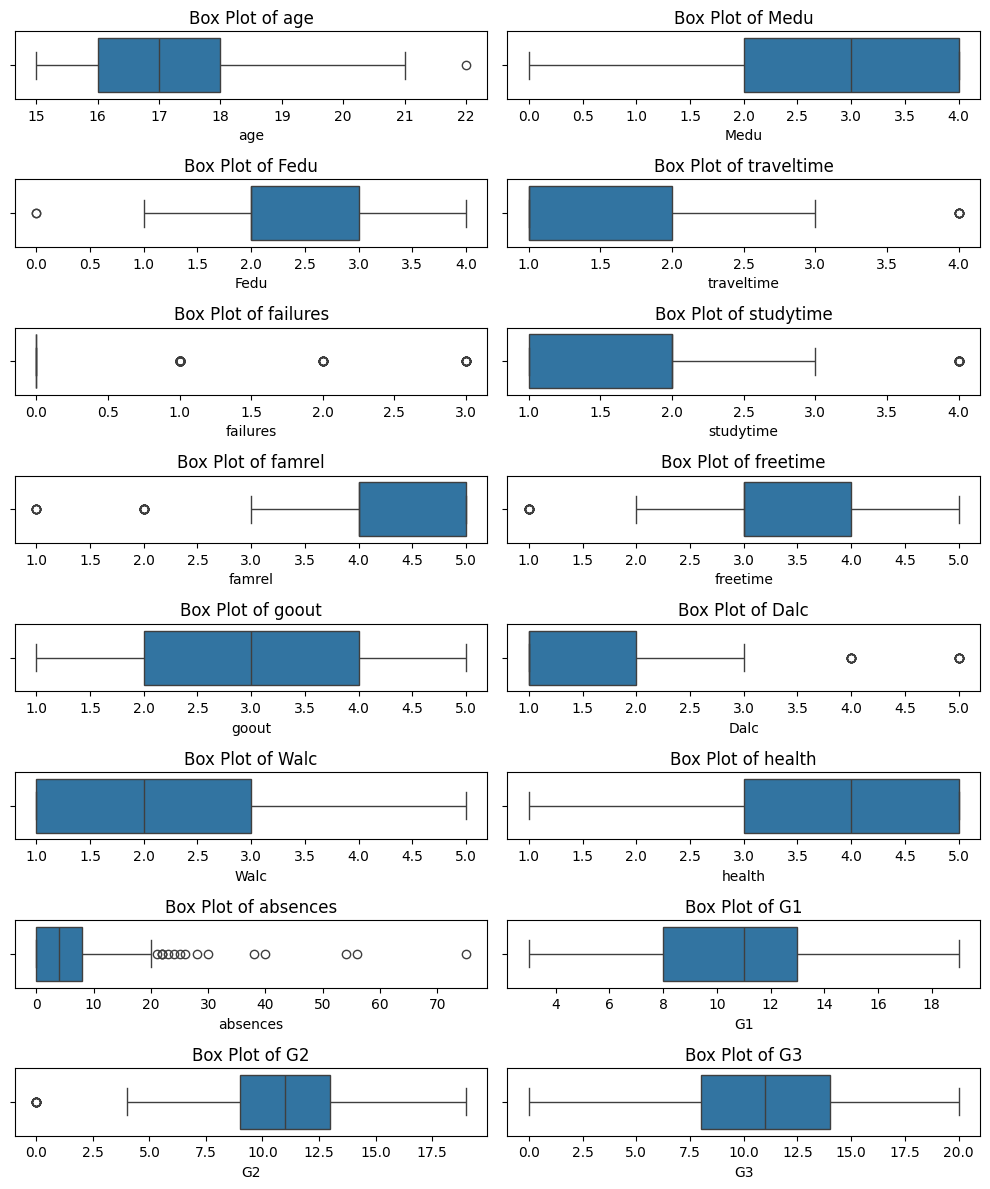

In [69]:
cols = ['age','Medu','Fedu','traveltime','failures','studytime','famrel','freetime','goout','Dalc','Walc','health','absences',
        'G1','G2','G3']
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
plt.figure(figsize=(10, 12))
for i, feature in enumerate(cols):
    plt.subplot(8, 2, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

In [70]:

exclude_from_clip = ['failures', 'traveltime', 'studytime', 'Medu', 'Fedu']

for col in cols:
    if col in df.columns:
        if col not in exclude_from_clip:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df[col] = df[col].clip(lower, upper)
            print(f"Applied clipping to: {col}")
        else:
            print(f"Skipped clipping for: {col}")

Applied clipping to: age
Skipped clipping for: Medu
Skipped clipping for: Fedu
Skipped clipping for: traveltime
Skipped clipping for: failures
Skipped clipping for: studytime
Applied clipping to: famrel
Applied clipping to: freetime
Applied clipping to: goout
Applied clipping to: Dalc
Applied clipping to: Walc
Applied clipping to: health
Applied clipping to: absences
Applied clipping to: G1
Applied clipping to: G2
Applied clipping to: G3


In [71]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col] = encoder.fit_transform(df[col])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    int64  
 1   age         395 non-null    int64  
 2   famsize     395 non-null    int64  
 3   Pstatus     395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   Fedu        395 non-null    int64  
 6   traveltime  395 non-null    int64  
 7   studytime   395 non-null    int64  
 8   failures    395 non-null    int64  
 9   schoolsup   395 non-null    int64  
 10  famsup      395 non-null    int64  
 11  paid        395 non-null    int64  
 12  activities  395 non-null    int64  
 13  nursery     395 non-null    int64  
 14  higher      395 non-null    int64  
 15  internet    395 non-null    int64  
 16  romantic    395 non-null    int64  
 17  famrel      395 non-null    float64
 18  freetime    395 non-null    float64
 19  goout       395 non-null    i

In [73]:
df.head()

,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,0,0,4,4,2,2,0,1,...,4.0,3.0,4,1.0,1,3,6,5,6,6
1,0,17,0,1,1,1,1,2,0,0,...,5.0,3.0,3,1.0,1,3,4,5,5,6
2,0,15,1,1,1,1,1,2,3,1,...,4.0,3.0,2,2.0,3,3,10,7,8,10
3,0,15,0,1,4,2,1,3,0,0,...,3.0,2.0,2,1.0,1,5,2,15,14,15
4,0,16,0,1,3,3,1,2,0,0,...,4.0,3.0,2,1.0,2,5,4,6,10,10


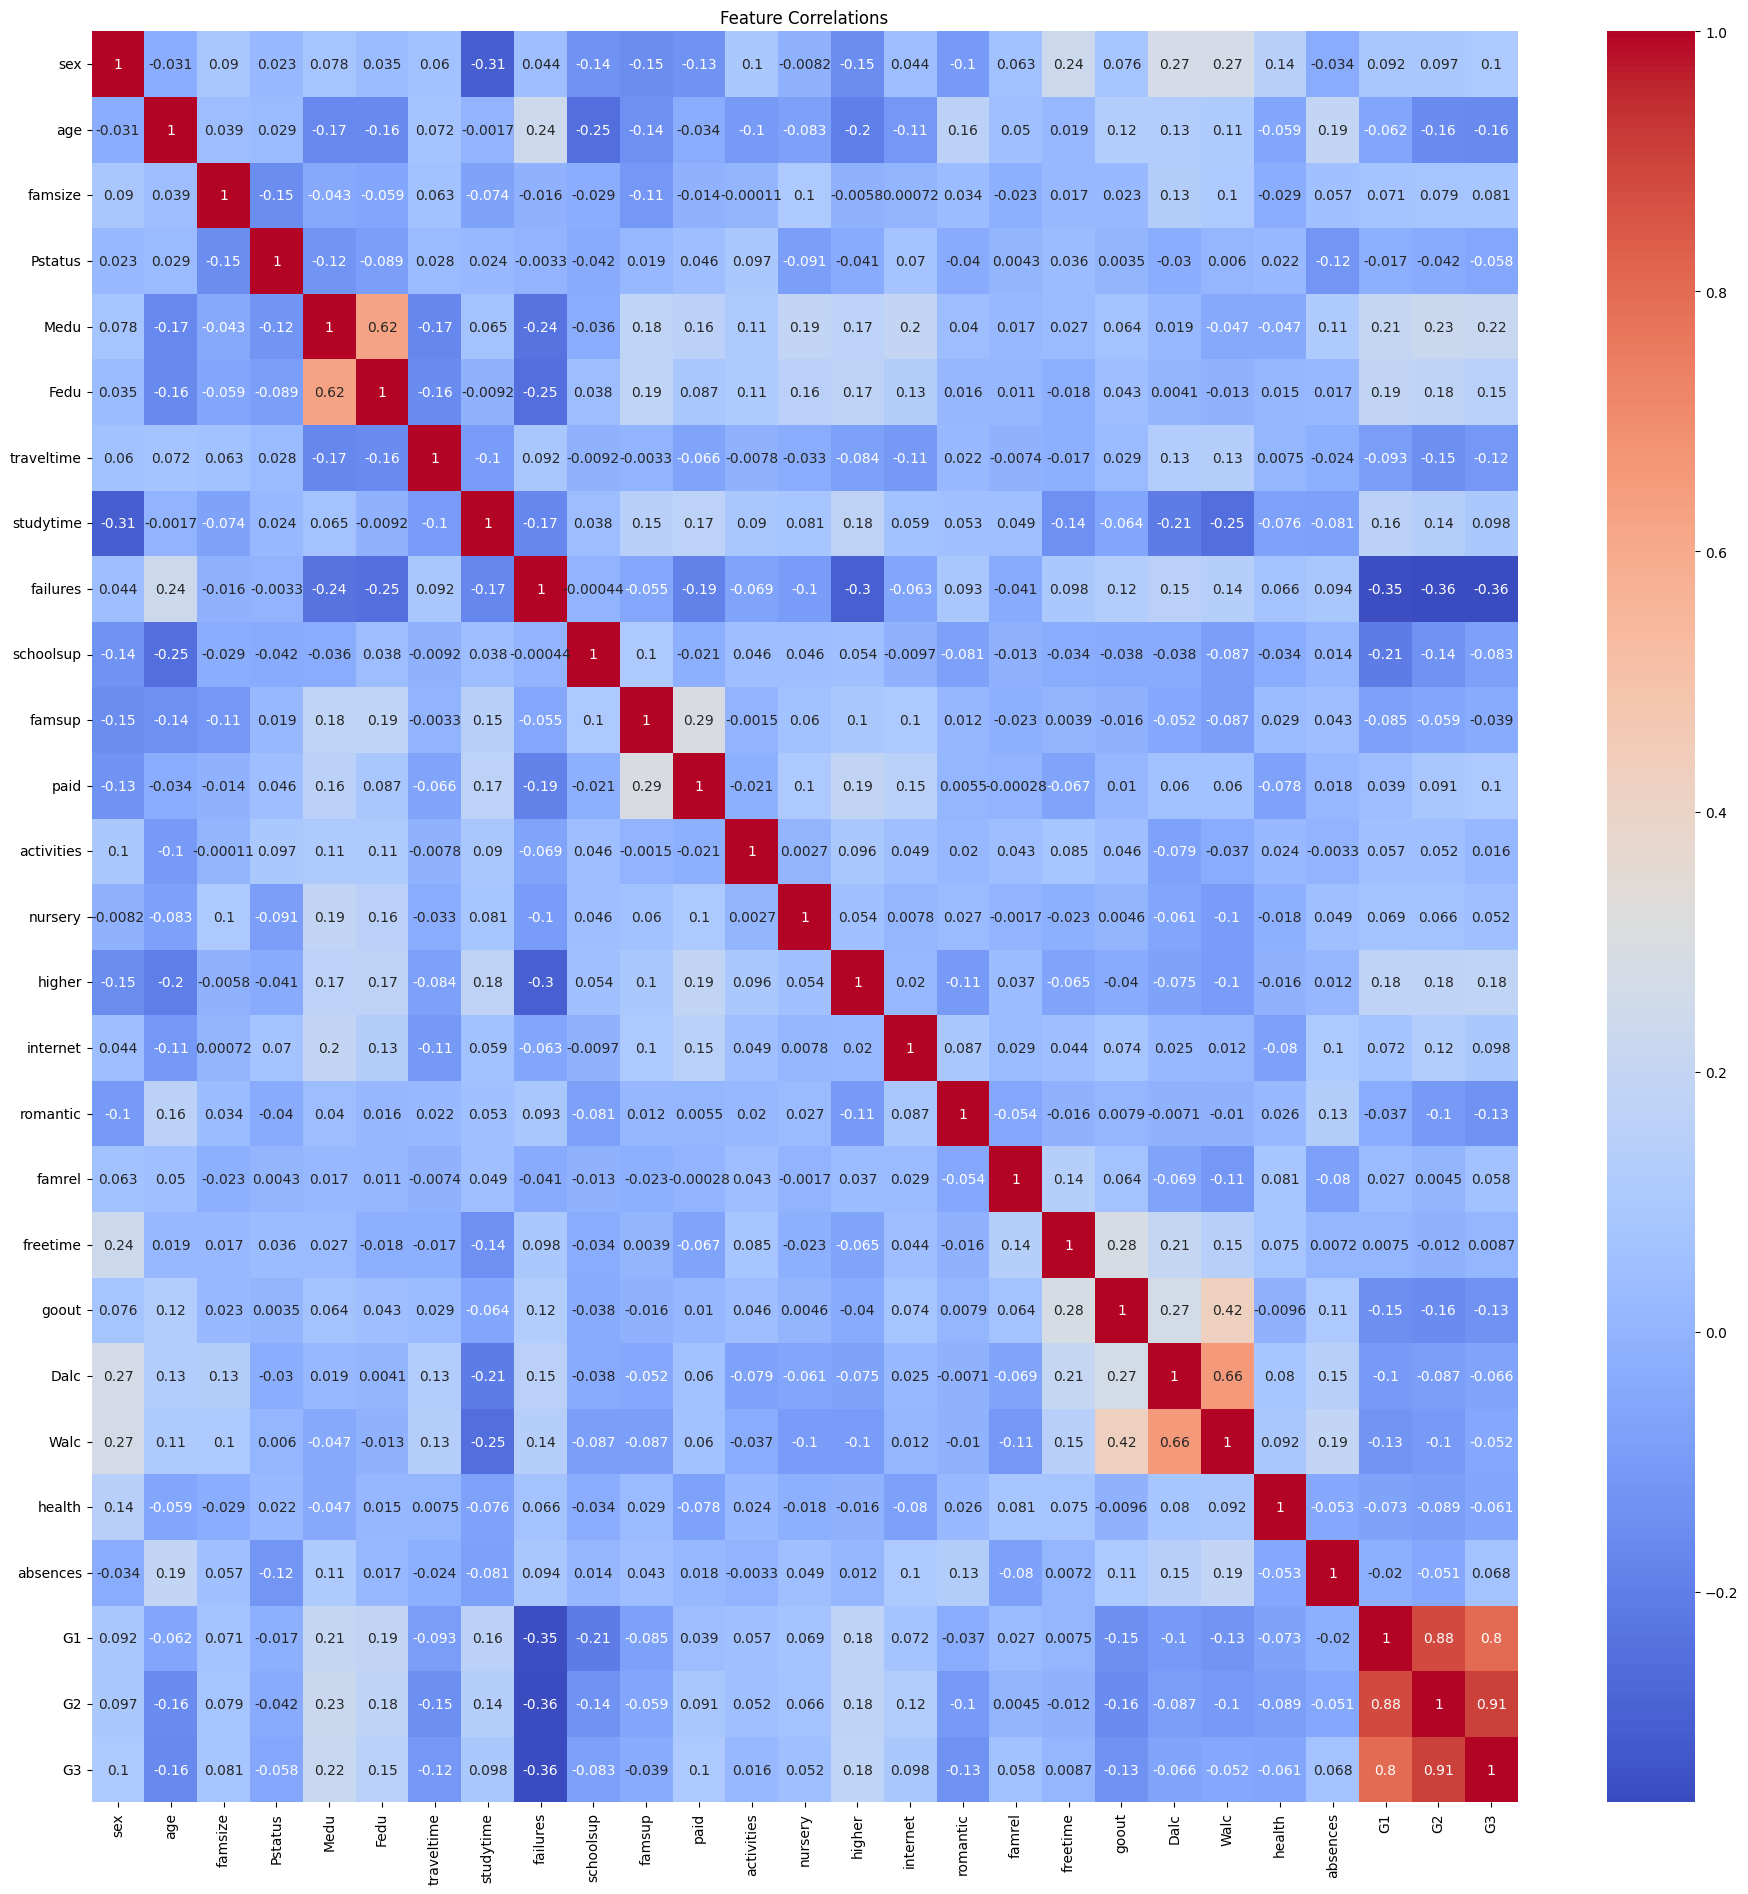

In [74]:
plt.figure(figsize=(23,23))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

In [75]:
print("NaNs in failures:", df['failures'].isnull().sum())

NaNs in failures: 0


In [76]:
print(df['failures'].dtype)


int64


In [77]:
print(df['failures'].nunique())

4


In [78]:
print(df['failures'].value_counts().sort_index())

failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64


(395, 27)


,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,0,0,4,4,2,2,0,1,...,4.0,3.0,4,1.0,1,3,6,5,6,6
1,0,17,0,1,1,1,1,2,0,0,...,5.0,3.0,3,1.0,1,3,4,5,5,6
2,0,15,1,1,1,1,1,2,3,1,...,4.0,3.0,2,2.0,3,3,10,7,8,10
3,0,15,0,1,4,2,1,3,0,0,...,3.0,2.0,2,1.0,1,5,2,15,14,15
4,0,16,0,1,3,3,1,2,0,0,...,4.0,3.0,2,1.0,2,5,4,6,10,10


,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.473418,16.693671,0.288608,0.896203,2.749367,2.521519,1.448101,2.035443,0.334177,0.129114,...,3.997468,3.259494,3.108861,1.435443,2.291139,3.554430,5.187342,10.908861,10.812658,10.415190
std,0.499926,1.266449,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,0.743651,0.335751,...,0.768176,0.949421,1.113278,0.741455,1.287897,1.390303,5.694448,3.319195,3.509283,4.581443
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,2.500000,1.500000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,0.000000
25%,0.000000,16.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,17.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,1.000000,18.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,21.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,...,5.000000,5.000000,5.000000,3.500000,5.000000,5.000000,20.000000,19.000000,19.000000,20.000000


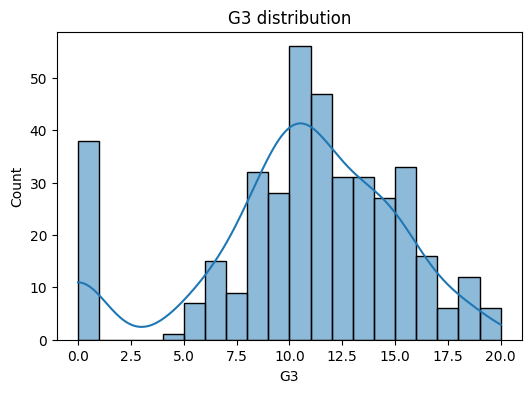

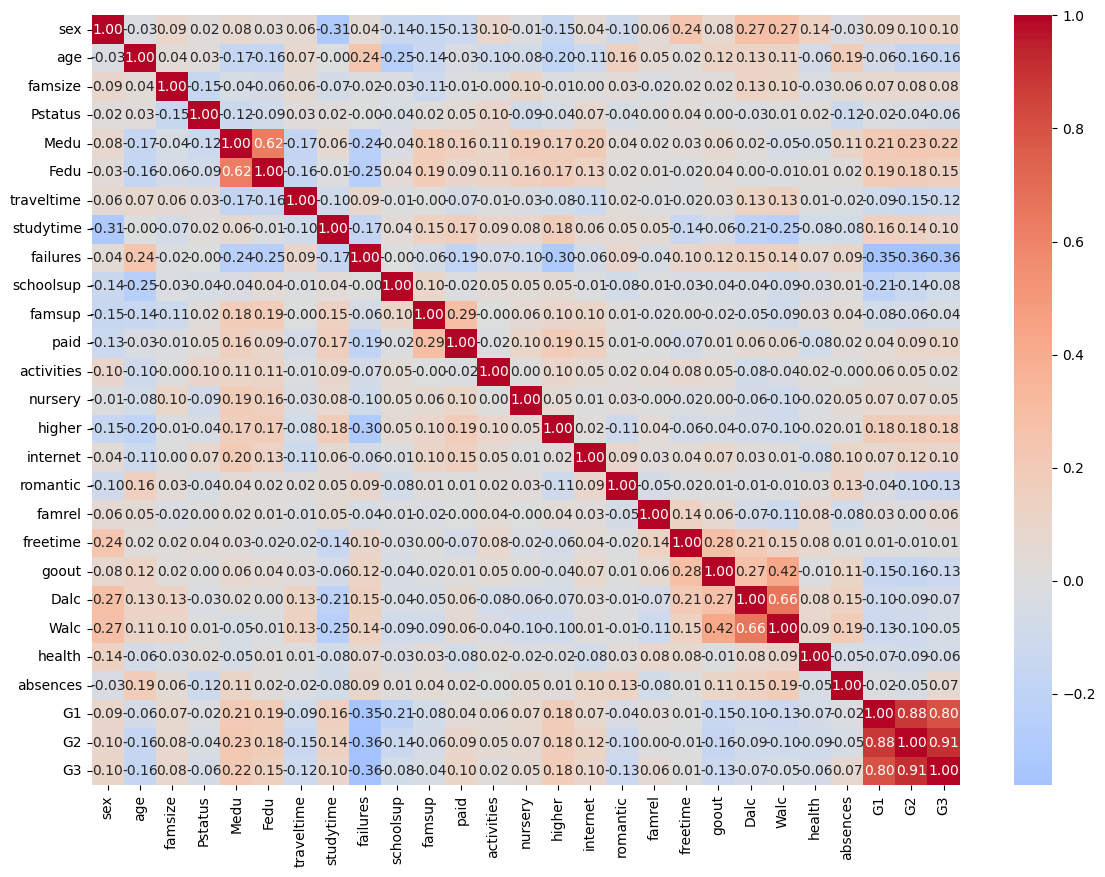

In [79]:

print(df.shape)
display(df.head())
display(df.describe())

plt.figure(figsize=(6,4))
sns.histplot(df['G3'], bins=20, kde=True)
plt.title('G3 distribution')
plt.show()

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.show()


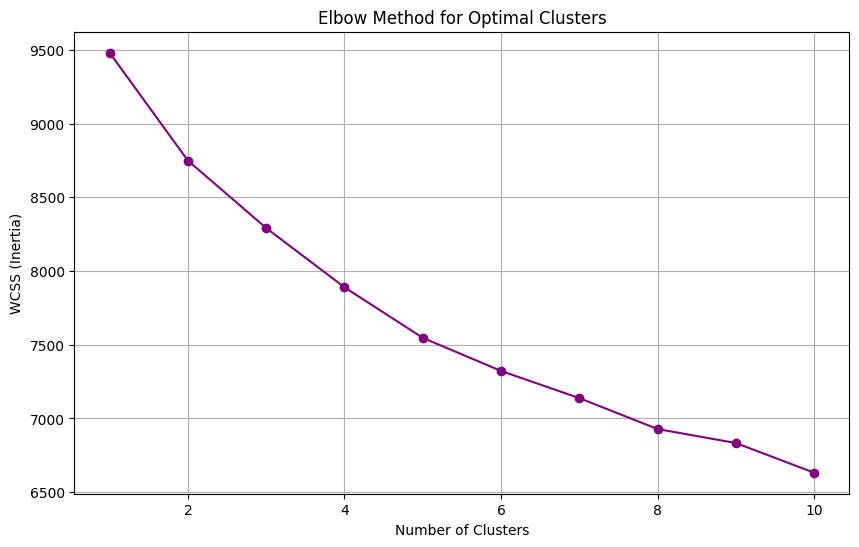

For n_clusters = 2, Silhouette Score: 0.1216
For n_clusters = 3, Silhouette Score: 0.0718
For n_clusters = 4, Silhouette Score: 0.0670
For n_clusters = 5, Silhouette Score: 0.0772


In [80]:
X_clustering = df.drop(['G1', 'G2', 'G3'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='purple')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

for n in range(2, 6):
    km = KMeans(n_clusters=n, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"For n_clusters = {n}, Silhouette Score: {score:.4f}")

In [81]:
X_clustering = df.drop(['G1', 'G2', 'G3'], axis=1, errors='ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
df['cluster_id'] = kmeans.fit_predict(X_scaled)

print("Cluster_id has been added successfully!")

Cluster_id has been added successfully!


In [82]:
cluster_impact = df.groupby('cluster_id')['G3'].mean()
df['cluster_weight'] = df['cluster_id'].map(cluster_impact)

print("Cluster Weight added based on average G3 per cluster.")

Cluster Weight added based on average G3 per cluster.


Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 150}

Final Classification Report (Hybrid with G2):
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        26
           1       0.98      0.85      0.91        53

    accuracy                           0.89        79
   macro avg       0.87      0.91      0.88        79
weighted avg       0.91      0.89      0.89        79



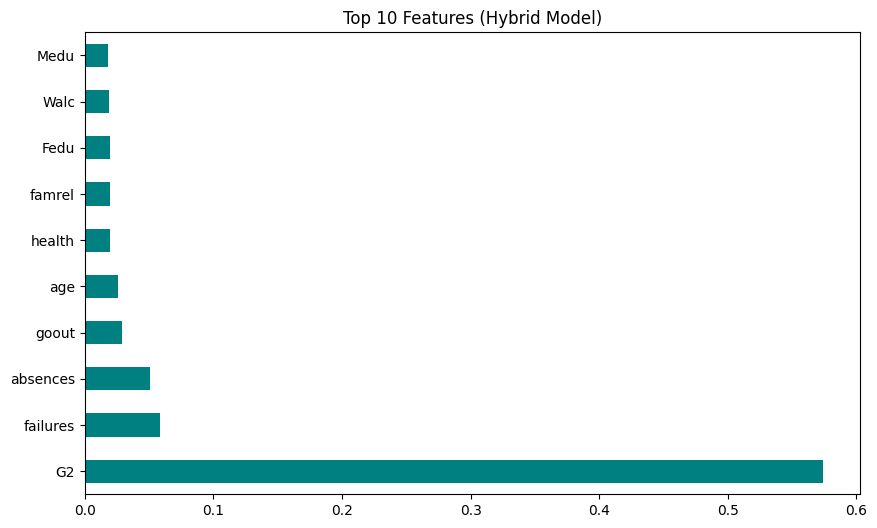

In [83]:
df['performance'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

X_hybrid = df.drop(['G3', 'performance', 'G1'], axis=1)
y = df['performance']

X_train, X_test, y_train, y_test = train_test_split(X_hybrid, y, test_size=0.2,
                                                    random_state=42, stratify=y)

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'class_weight': ['balanced'],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 5. الموديل الأفضل والنتائج النهائية
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(f"Best Parameters: {grid_search.best_params_}")
print("\nFinal Classification Report (Hybrid with G2):")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
importances = pd.Series(best_rf.feature_importances_, index=X_hybrid.columns)
importances.nlargest(10).plot(kind='barh', color='teal')
plt.title('Top 10 Features (Hybrid Model)')
plt.show()

Accuracy Without Cluster: 0.8734
Accuracy With Cluster (Hybrid): 0.8861
Actual Improvement: 1.45%


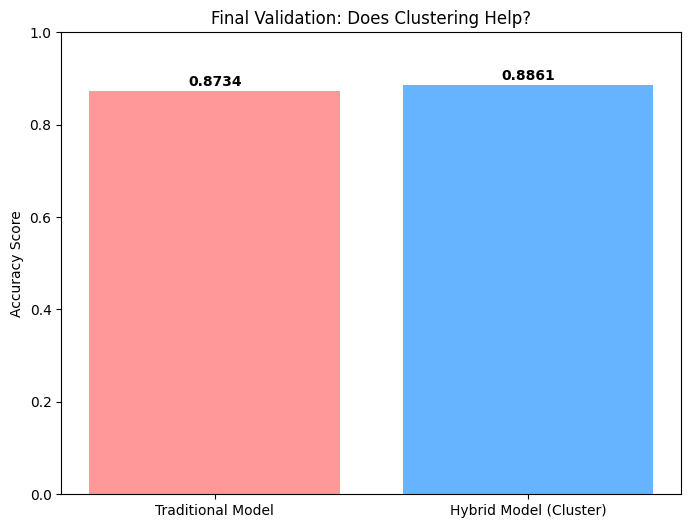

In [84]:
from sklearn.metrics import accuracy_score, f1_score

best_params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 5,
    'class_weight': 'balanced',
    'random_state': 42
}

X_no_cluster = df.drop(['G3', 'performance', 'G1', 'cluster_id', 'cluster_weight'], axis=1, errors='ignore')
y = df['performance']
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X_no_cluster, y, test_size=0.2, random_state=42, stratify=y)

X_hybrid = df.drop(['G3', 'performance', 'G1'], axis=1, errors='ignore')
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_hybrid, y, test_size=0.2, random_state=42, stratify=y)

model_no_cluster = RandomForestClassifier(**best_params)
model_hybrid = RandomForestClassifier(**best_params)

model_no_cluster.fit(X_train_nc, y_train_nc)
model_hybrid.fit(X_train_h, y_train_h)

acc_nc = accuracy_score(y_test_nc, model_no_cluster.predict(X_test_nc))
acc_h = accuracy_score(y_test_h, model_hybrid.predict(X_test_h))

improvement = ((acc_h - acc_nc) / acc_nc) * 100
print(f"Accuracy Without Cluster: {acc_nc:.4f}")
print(f"Accuracy With Cluster (Hybrid): {acc_h:.4f}")
print(f"Actual Improvement: {improvement:.2f}%")

plt.figure(figsize=(8, 6))
bars = plt.bar(['Traditional Model', 'Hybrid Model (Cluster)'], [acc_nc, acc_h], color=['#ff9999','#66b3ff'])
plt.ylim(0, 1.0)
plt.ylabel('Accuracy Score')
plt.title('Final Validation: Does Clustering Help?')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha='center', fontweight='bold')
plt.show()